In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/sujata/fer2013/

/content/drive/MyDrive/sujata/fer2013


In [ ]:
!ls

fer2013.bib  fer2013.csv  README


In [ ]:
import tarfile 
fname='fer2013.tar.gz'

if fname.endswith("tar.gz"):
  tar=tarfile.open(fname, "r:gz")
  tar.extractall()
  tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from skimage.feature import hog

In [ ]:
data = pd.read_csv('fer2013.csv')
data.head()        

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [ ]:
df = pd.read_csv('fer2013.csv')
df.head()
df.shape

(35887, 3)

In [ ]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
np.array(df.pixels.loc[0].split(' ')).reshape(48,48)

array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

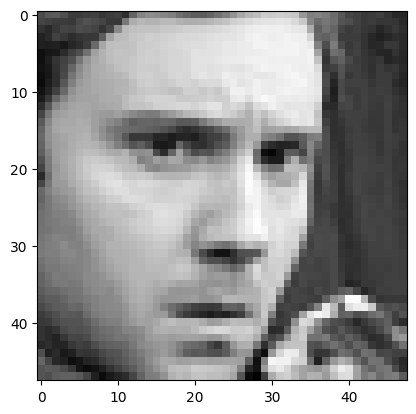

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.array(df.pixels.loc[0].split(' ')).reshape(48,48).astype('float'), cmap='gray')
plt.show()


In [ ]:
label_to_text = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


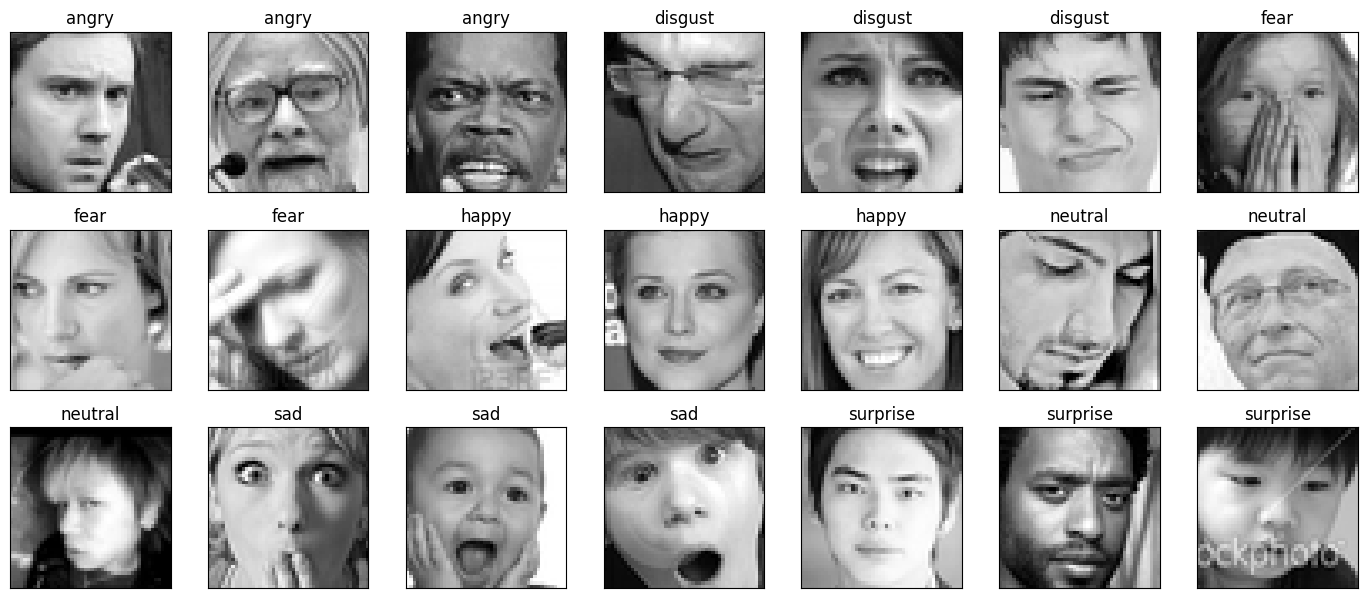

In [ ]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        plt.tight_layout()


In [ ]:
img_array = df.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48,48,1).astype('float'))

In [ ]:
img_array = np.stack(img_array,axis=0)

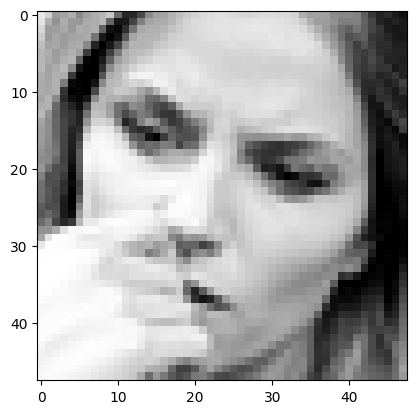

In [ ]:
plt.imshow(img_array[2], cmap='gray')

In [ ]:
labels = df.emotion.values
labels


array([0, 0, 2, ..., 0, 3, 2])

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(img_array,labels,test_size =.2)

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [ ]:
# SVM classifier

svm = GridSearchCV(SVC(), param_grid, cv=3)
svm.fit(X_train.reshape(X_train.shape[0], -1), y_train)


In [ ]:
# SVM classifier
svm = SVC(C=1, kernel='rbf')
train_acc = svm.fit(X_train.reshape(X_train.shape[0], -1), y_train)


In [ ]:
train_accuracy = svm.score(X_train.reshape(X_train.shape[0], -1), y_train)
print(train_accuracy)

45

In [ ]:
# Predict on test set
y_pred = svm.predict(X_test.reshape(X_test.shape[0], -1))

# Print test accuracy
test_acc = svm.score(X_test.reshape(X_test.shape[0], -1), y_test)
print('Test Accuracy:', test_acc)

Test Accuracy: 0.4296461409863472


              precision    recall  f1-score   support

           0       0.46      0.21      0.29      1032
           1       1.00      0.04      0.08       116
           2       0.38      0.23      0.28      1003
           3       0.48      0.73      0.58      1798
           4       0.30      0.38      0.34      1155
           5       0.61      0.49      0.54       826
           6       0.38      0.39      0.39      1248

    accuracy                           0.43      7178
   macro avg       0.52      0.35      0.36      7178
weighted avg       0.44      0.43      0.41      7178



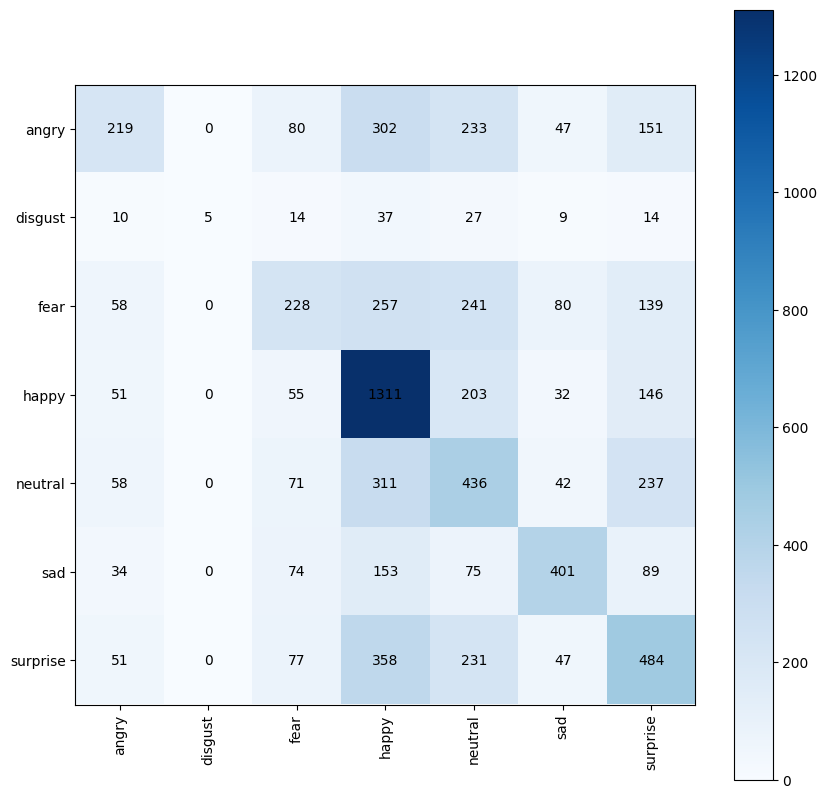

In [ ]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 10))
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, conf_mat[i, j], horizontalalignment='center', verticalalignment='center')
plt.xticks(range(len(label_to_text)), label_to_text.values(), rotation=90)
plt.yticks(range(len(label_to_text)), label_to_text.values())
plt.colorbar()
plt.show()

TypeError: ignored

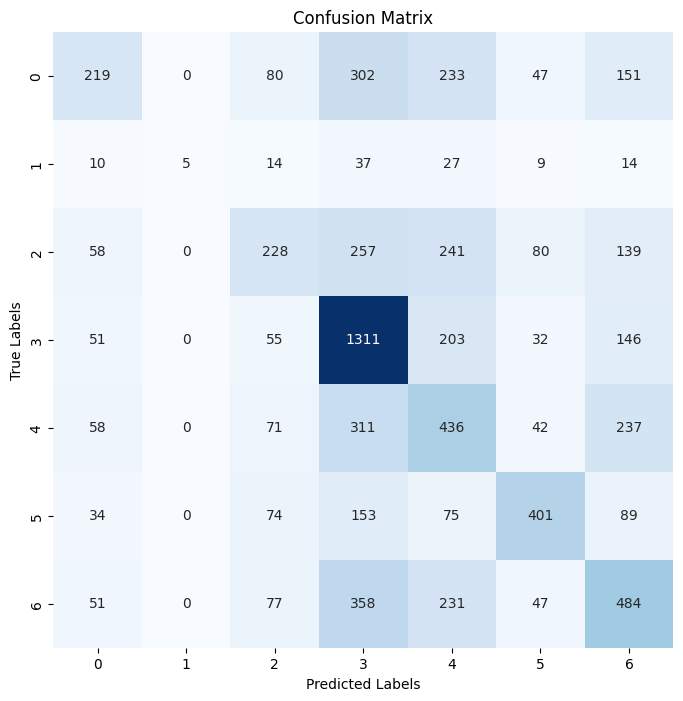

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap plot of the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

# Set the tick labels
class_names = label_to_text.values()
tick_marks = range(len(class_names))
ax.set_xticks(tick_marks + 0.5)
ax.set_xticklabels(class_names, rotation=45)
ax.set_yticks(tick_marks + 0.5)
ax.set_yticklabels(class_names, rotation=0)

# Set the font size for the axis labels and tick labels
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
ax.tick_params(axis='both', labelsize=12)

plt.show()


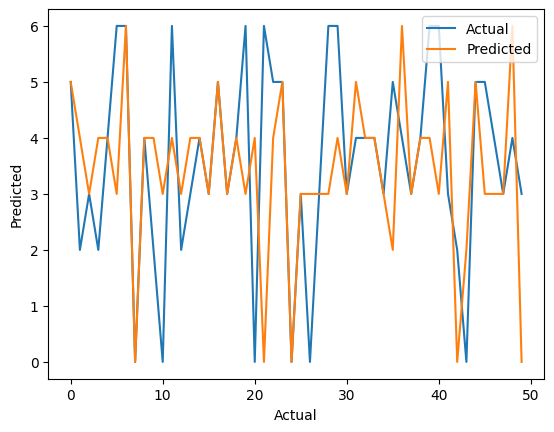

In [ ]:
# Plot line graph
plt.plot(y_test[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


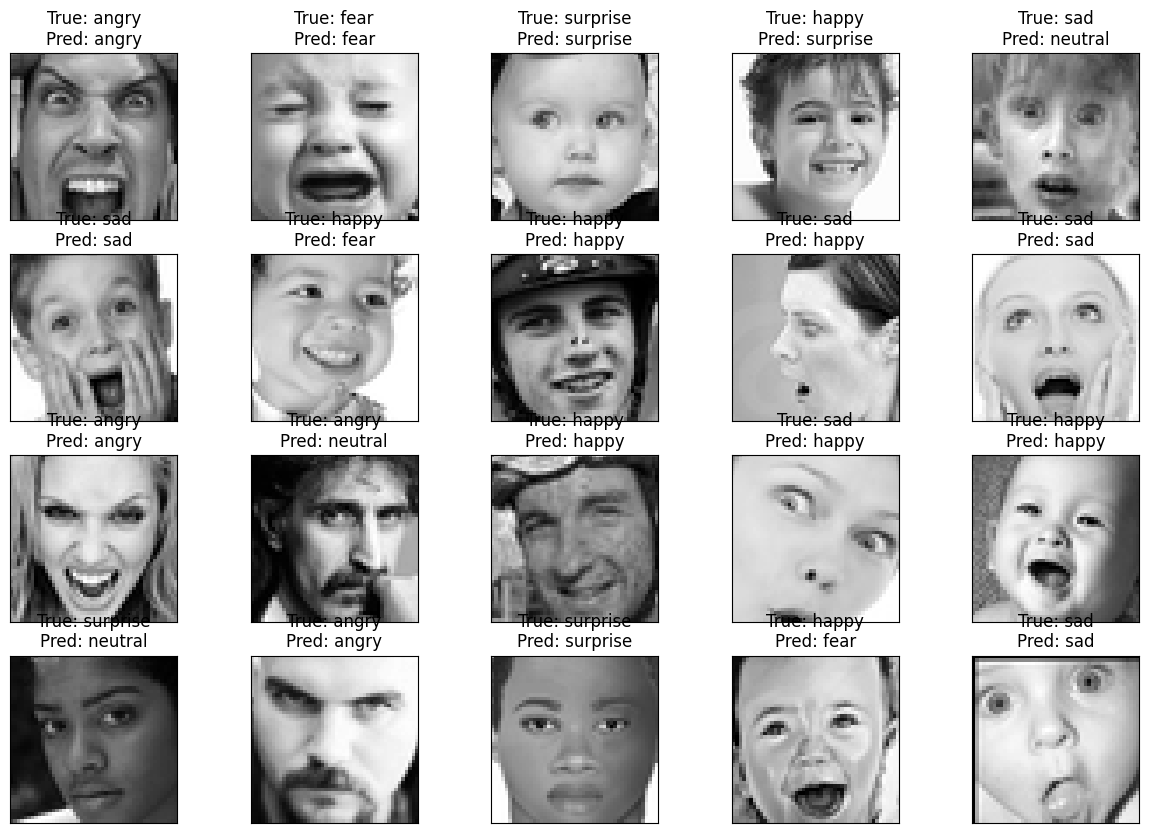

In [ ]:
# Obtain predictions for the training set
train_pred = svm.predict(X_train.reshape(X_train.shape[0], -1))

# Choose 20 random indices from the training set
indices = np.random.choice(range(len(X_train)), size=20, replace=False)

# Plot the images and their labels
fig = plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    ax = fig.add_subplot(4, 5, i+1)
    ax.imshow(X_train[idx], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('True: {}\nPred: {}'.format(label_to_text[y_train[idx]], label_to_text[train_pred[idx]]))
plt.show()


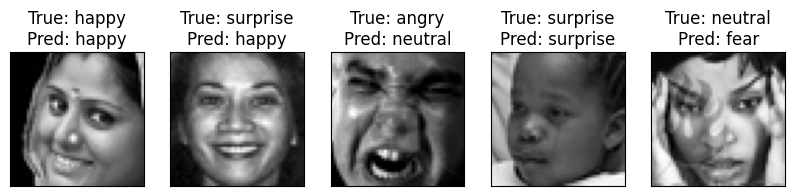

In [ ]:
# Choose 5 random test images
n_images = 5
idx = np.random.choice(range(len(X_test)), size=n_images, replace=False)

# Predict labels for chosen images
predicted_labels = svm.predict(X_test[idx].reshape(n_images, -1))

# Show images and labels
fig = plt.figure(figsize=(10, 5))
for i in range(n_images):
    # Show image
    ax = fig.add_subplot(1, n_images, i+1)
    ax.imshow(X_test[idx[i]], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('True: {}\nPred: {}'.format(label_to_text[y_test[idx[i]]], label_to_text[predicted_labels[i]]))
plt.show()


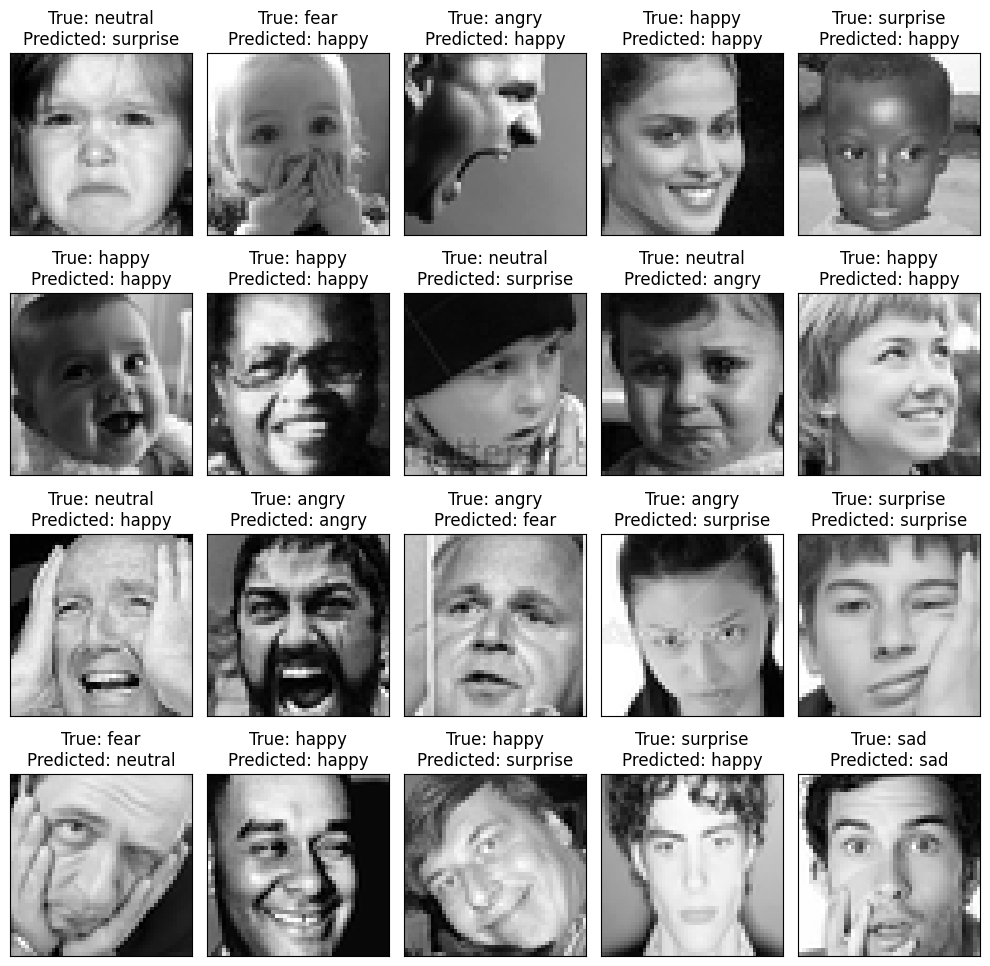

In [ ]:
fig = plt.figure(figsize=(10, 10))
k = 0
for i in range(20):
    img = X_test[k].reshape(48, 48)
    true_label = label_to_text[y_test[k]]
    predicted_label = label_to_text[svm.predict(X_test[k].reshape(1, -1))[0]]
    k += 1
    ax = plt.subplot(4, 5, i+1)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('True: {}\nPredicted: {}'.format(true_label, predicted_label))
    plt.tight_layout()
plt.show()
